![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Laboratorio | Análisis de Cliente Ronda 4

En la lección de hoy hablamos sobre distribuciones continuas (principalmente distribución normal), regresión lineal y cómo la multicolinealidad puede afectar el modelo. En este laboratorio, probaremos su conocimiento sobre esas cosas usando el archivo `marketing_customer_analysis.csv`.

### Completa la siguiente tarea

- Comprobar los tipos de datos de las columnas. Obtenga los datos numéricos en un marco de datos llamado `numérico` y columnas categóricas en un marco de datos llamado `categoricals`.
(Puede usar np.number y np.object para seleccionar los tipos de datos numéricos y los tipos de datos categóricos respectivamente)
- Ahora intentaremos comprobar visualmente la normalidad de las variables numéricas
  - Utilice la biblioteca marina para construir diagramas de distribución para las variables numéricas
  - Usa Matplotlib para construir histogramas
  - ¿Las distribuciones para diferentes variables numéricas se parecen a una distribución normal?
- Para las variables numéricas, comprobar la multicolinealidad entre las características. Tenga en cuenta que utilizaremos la columna `total_claim_amount` más adelante como la variable de destino.
- Descartar una de las dos características que muestran una alta correlación entre ellas (superior a 0,9). Escriba el código tanto para la matriz de correlación como para el mapa de calor marino. Si no hay un par de funciones que tengan una correlación alta, no descarte ninguna función.

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Comprobar los tipos de datos de las columnas. Obtenga los datos numéricos en un marco de datos llamado `numérico` y columnas categóricas en un marco de datos llamado `categoricals`.

In [3]:
# Verificando el tipo de datos de nuestro DF
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
# creando la variable numérico que contenga los datos categoricos de tipo numérico, utilizamos la función (select_dtypes) que selecciona el tipo de datos 
# y posteriormente le aplicamos (include=[np.number]) el cual con 'include' le indicamos que nos incluya [np.number] (los datos numéricos)
# para la categorica hacemos lo mismo pero le indicamos que nos incluya los categoricos [np.object] 

numeric = data.select_dtypes(include=[np.number])
numeric

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [5]:
categoricals = data.select_dtypes(include=[np.object])
categoricals

<ipython-input-5-2975037b56e9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(include=[np.object])


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Ahora intentaremos comprobar visualmente la normalidad de las variables numéricas :
  - Utilice la biblioteca marina para construir diagramas de distribución para las variables numéricas
  - Usa Matplotlib para construir histogramas



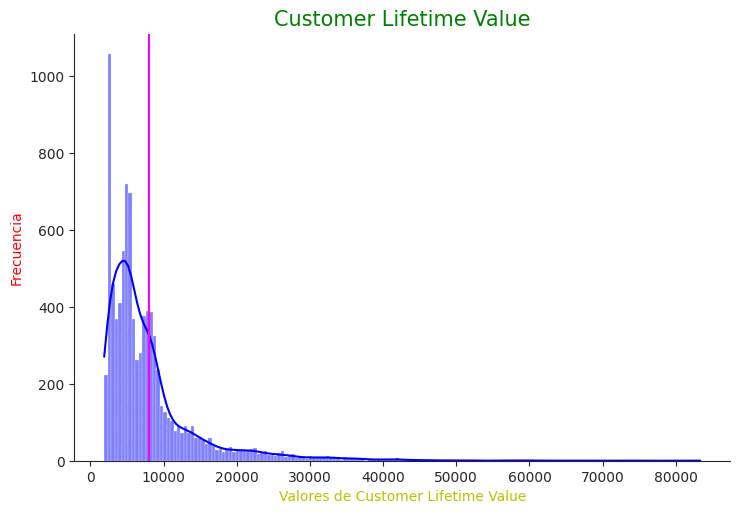

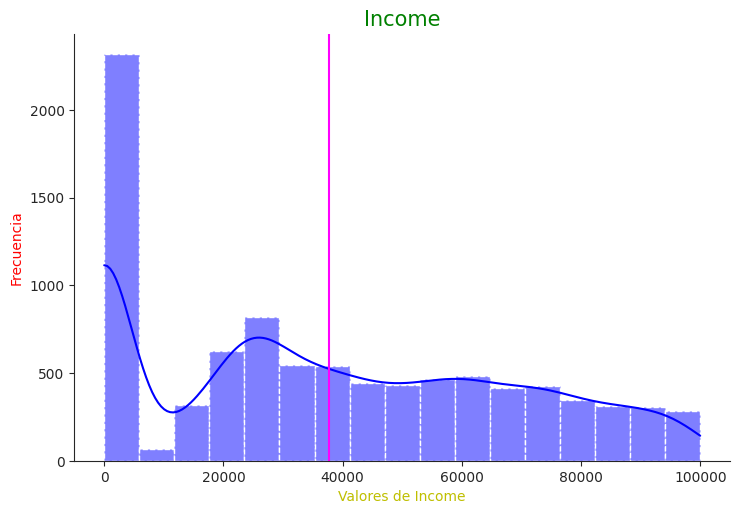

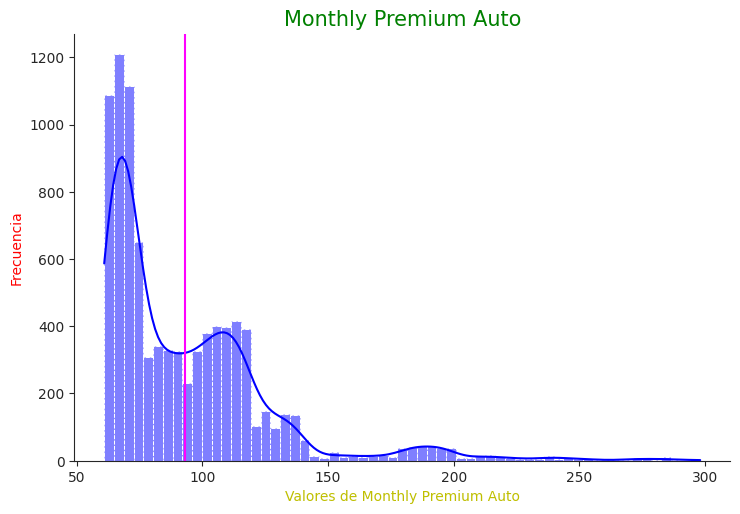

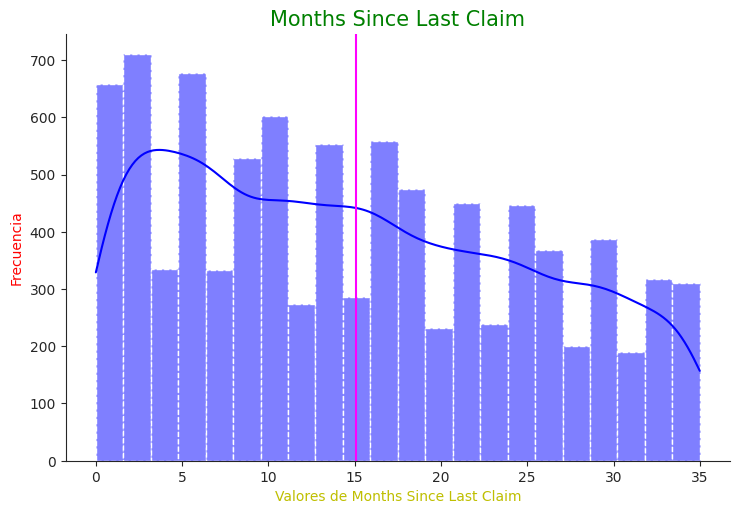

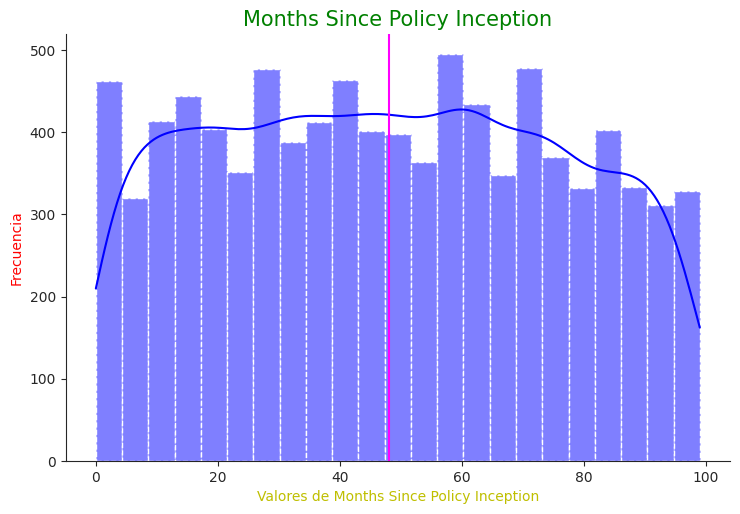

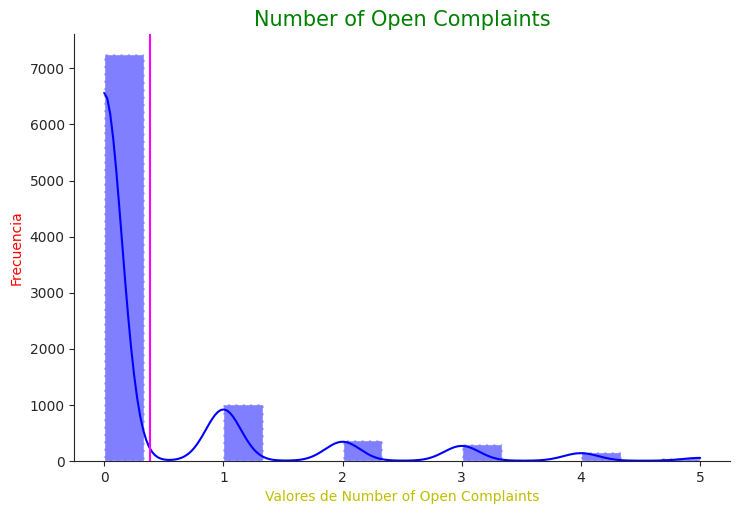

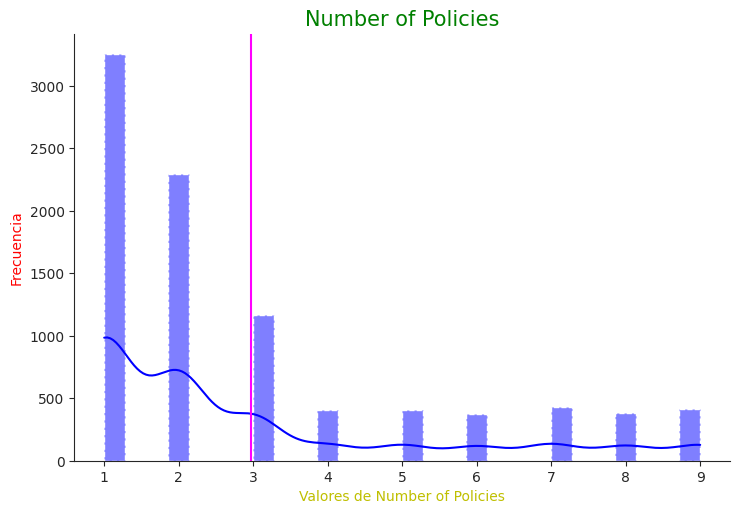

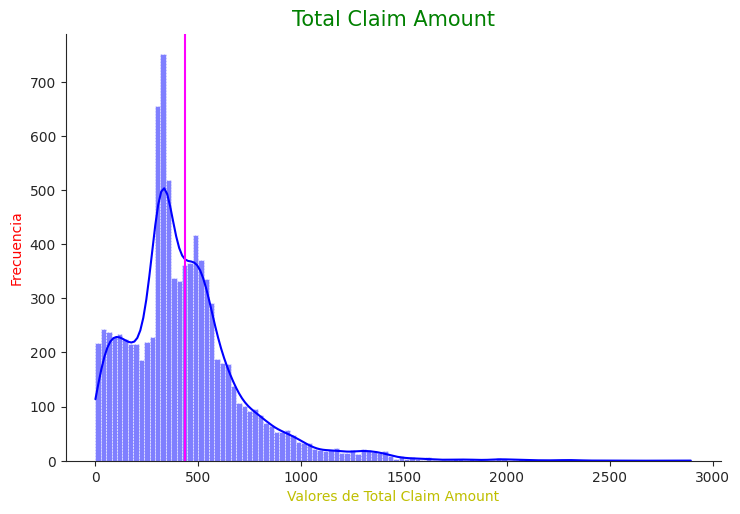

In [6]:
# Usando la libreria Seaborn para visualizar los datos

'''  
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_style("dark")
sns.set_style("white")
sns.set_style("darkgrid")
'''


for columna in numeric.columns:      # Aplicamos un loop para iterar a través de las columnas numéricas y trazar los gráficos de distribución 
    
    sns.set_style("ticks")
    sns.displot(numeric[columna], kde=True, color='b', linestyle='--',height=5, aspect=1.5)
    plt.axvline(numeric[columna].mean(), color='magenta')  # esta linea nos indica la media
    plt.title(columna,color='g',fontsize=15)
    plt.xlabel('Valores de ' + columna,color='y')
    plt.ylabel('Frecuencia',color='r')
    
    plt.show()

  - ¿Las distribuciones para diferentes variables numéricas se parecen a una distribución normal?

  R = Solo vemos una distribución normal en la columna Total Claim Amount

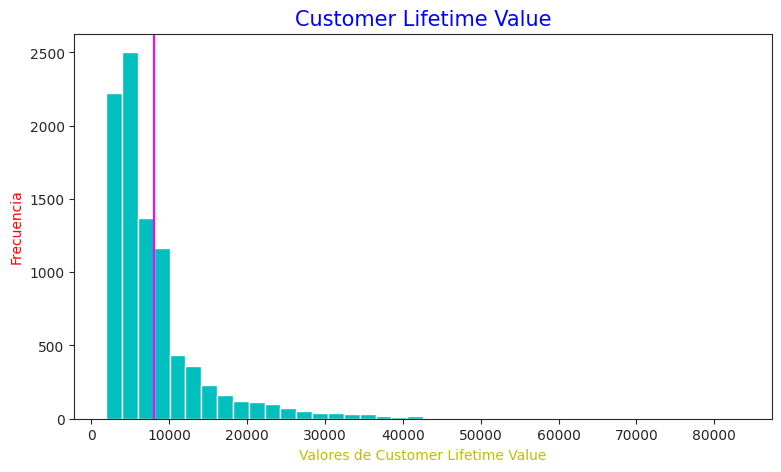

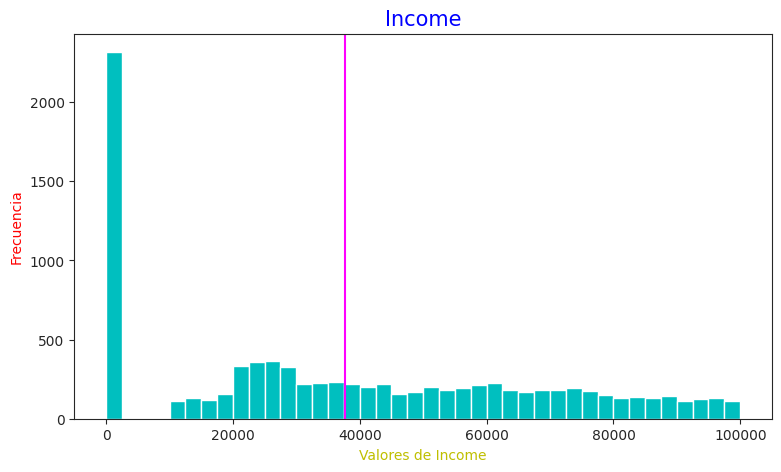

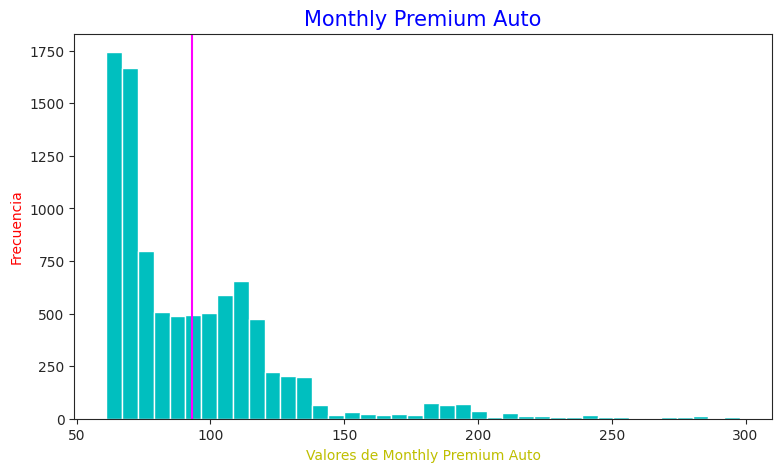

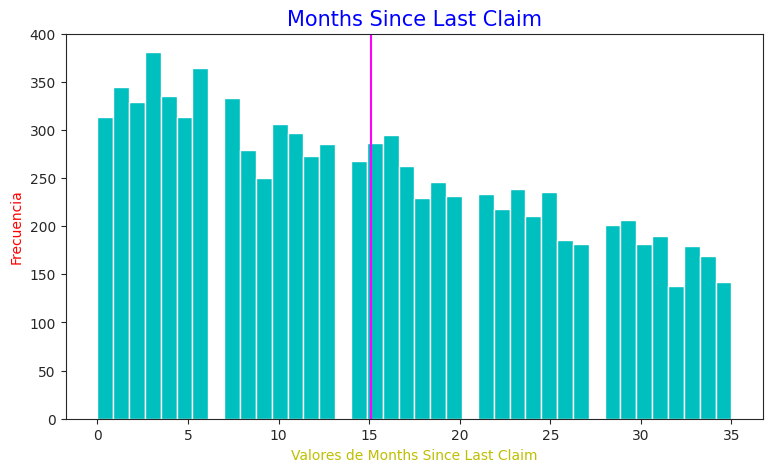

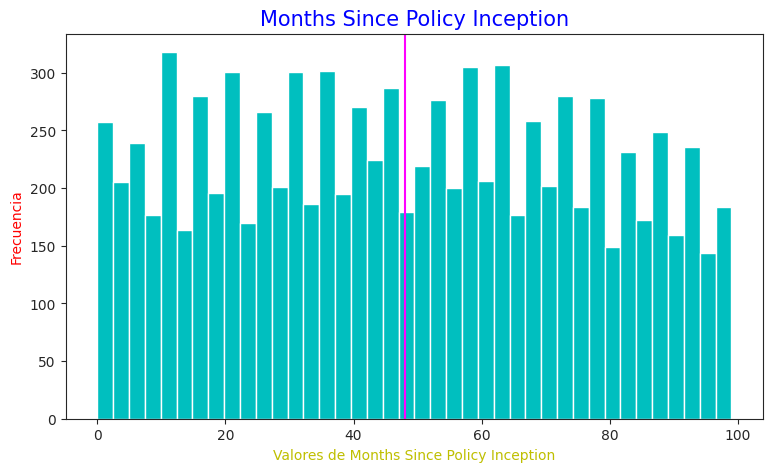

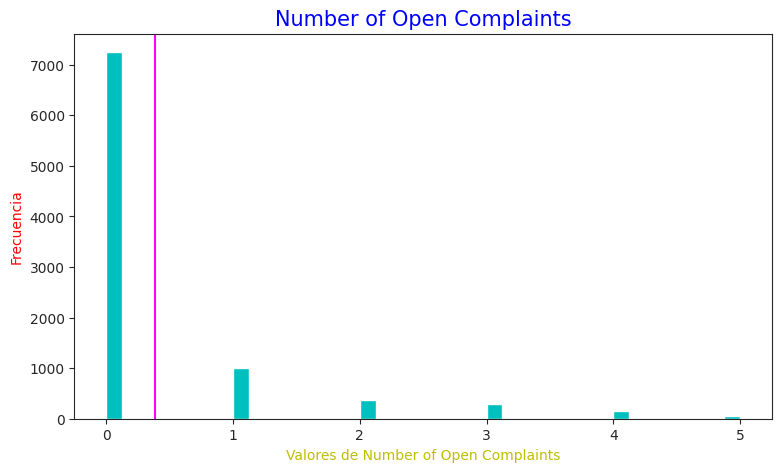

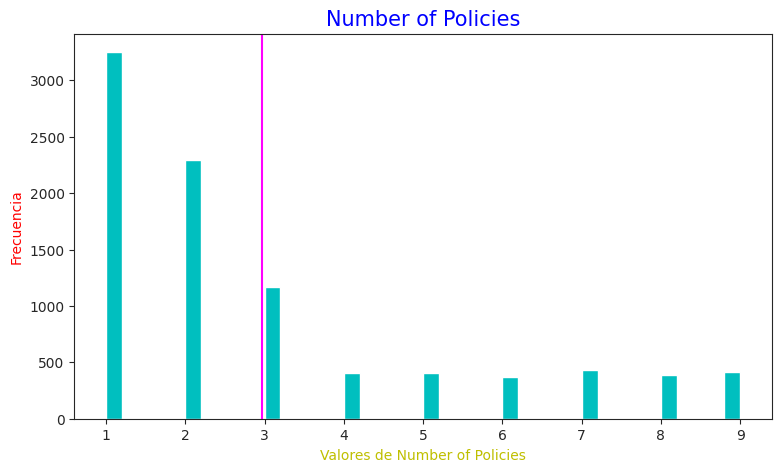

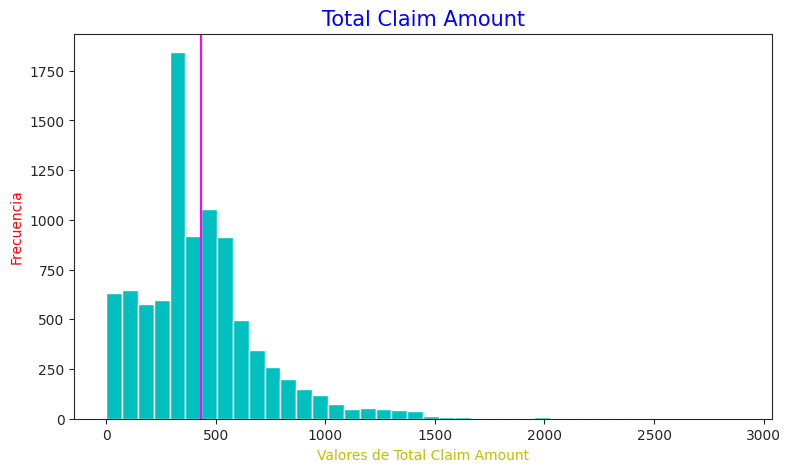

In [7]:
# Utilizando la libreria matplotlib y visualizarlas para las columnas numéricas
for columna in numeric.columns:
    
    plt.figure(figsize=(9,5))
    plt.hist(numeric[columna],bins=40,color='c')
    plt.axvline(numeric[columna].mean(), color='magenta')  # esta linea nos indica la media
    plt.xlabel('Valores de ' + columna,color='y')
    plt.ylabel('Frecuencia',color='r')
    plt.title(columna,color='blue',fontsize=15)
  
    plt.show()


- Para las variables numéricas, comprobar la multicolinealidad entre las características. Tenga en cuenta que utilizaremos la columna `total_claim_amount` más adelante como la variable de destino.

In [8]:
# matriz de correlación
corr_matrix = numeric.corr()
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [9]:
corr_matrix = numeric.corr(method='pearson')
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

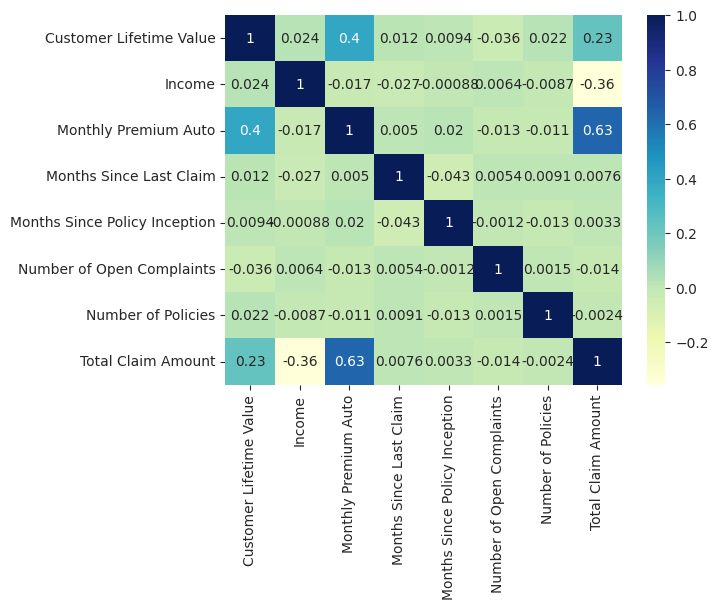

In [10]:
# visualizando el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

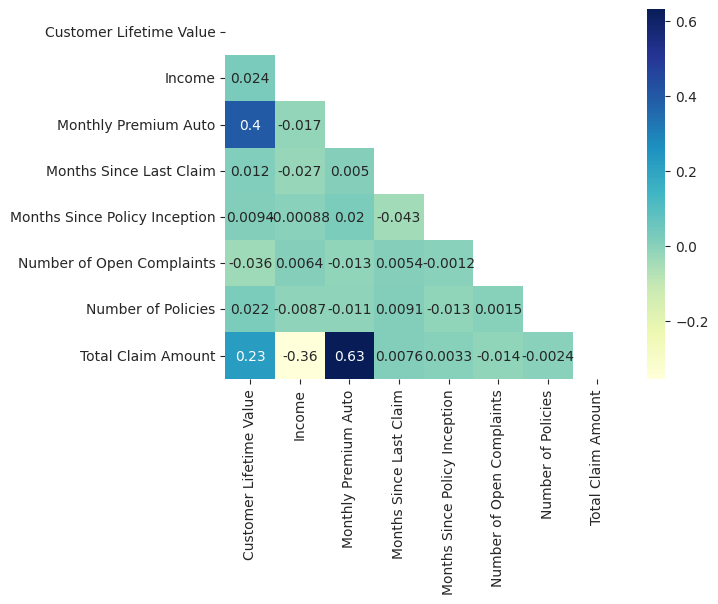

In [19]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True 
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu')
plt.show()

<Axes: >

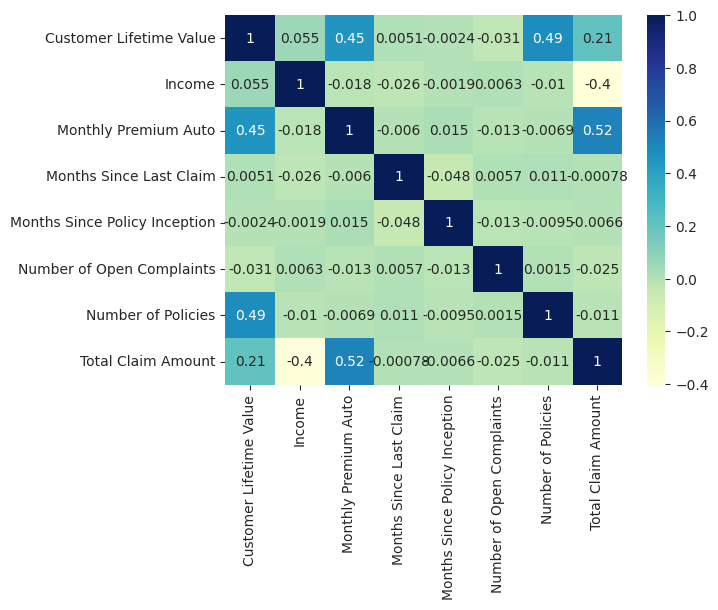

In [20]:
# calculando la correlación con Spearman
corr_matrix = numeric.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

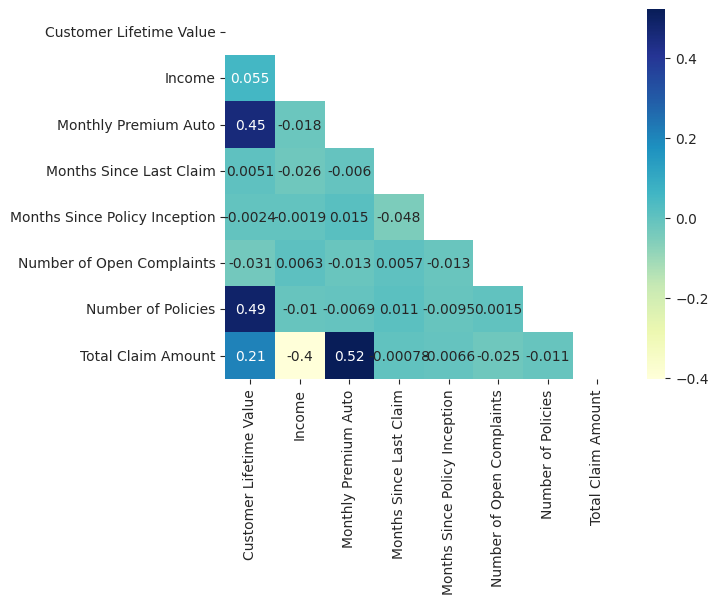

In [21]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True 
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu')
plt.show()

In [22]:
# Calculamos la matriz de correlación de Pearson para las columnas numéricas
corr_matrix = numeric.corr()
corr_tot_cla_amo = corr_matrix['Total Claim Amount'] # Obtenemos los valores de correlación de la variable 'Total Claim Amount' con respecto a las otras variables

print(corr_tot_cla_amo)


Customer Lifetime Value          0.226451
Income                          -0.355254
Monthly Premium Auto             0.632017
Months Since Last Claim          0.007563
Months Since Policy Inception    0.003335
Number of Open Complaints       -0.014241
Number of Policies              -0.002354
Total Claim Amount               1.000000
Name: Total Claim Amount, dtype: float64


In [23]:
# con Spearman
corr_matrix = numeric.corr(method='spearman')
corr_tot_cla_amo = corr_matrix['Total Claim Amount'] 
print(corr_tot_cla_amo)

Customer Lifetime Value          0.210598
Income                          -0.401598
Monthly Premium Auto             0.522261
Months Since Last Claim         -0.000782
Months Since Policy Inception   -0.006569
Number of Open Complaints       -0.024694
Number of Policies              -0.011100
Total Claim Amount               1.000000
Name: Total Claim Amount, dtype: float64


- Descartar una de las dos características que muestran una alta correlación entre ellas (superior a 0,9). Escriba el código tanto para la matriz de correlación como para el mapa de calor marino. Si no hay un par de funciones que tengan una correlación alta, no descarte ninguna función.

 R = No se encontro ninguna correlación superior a 0.9. 

-  Solo se encontro una relación media para con 'Monthly Premium Auto' de 0.63  con Pearson 
-  y relación media para con 'Monthly Premium Auto' de 0.52  con Spearman
 